# EXPLORING SEVIR DATA ON EVENT ID - S835047

### SEVIR - Storm EVent ImagRy 
This dataset consists of spatially and temporally images containing weather events captured by satellite. The below image shows thousands of samples in SEVIR dataset. These events consists of 4 hours of data in 5 hours increments sampled over the US. Each event in SEVIR has 5 different image types that are captured by 5 different sensors.



<image src="https://nbviewer.org/github/MIT-AI-Accelerator/eie-sevir/blob/master/examples/tutorial_img/sevir_sample.gif"></image>

### Scope 
- Downloading SEVIR DATA based on event id
- Accessing SEVIR DATA
- Visualising SEVIR DATA
- Georeferencing SEVIR DATA

### Data Organisation
SEVIR contains two major components:

- Catalog: A CSV file with rows describing the metadata of an event
- Data Files: A set of HDF5 files containing events for a certain sensor type

In [102]:
import resource
import boto3

In [103]:
import botocore
from botocore.handlers import disable_signing
resource = boto3.resource('s3')

In [104]:
resource.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
bucket=resource.Bucket('sevir')

In [105]:
import pandas as pd 

In [106]:
df=pd.read_csv('/Users/moukthikamanapati/Desktop/BigData7245/data/CATALOG.csv',low_memory=False)

In [107]:
CATALOG_PATH='/Users/moukthikamanapati/Desktop/BigData7245/data/CATALOG.csv'
DATA_PATH    = '/Users/moukthikamanapati/Desktop/BigData7245/data'


In [108]:
df[df.id.str.startswith('S835047')]

,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
19299,S835047,vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5,14,vil,2019-06-26 21:32:00,-122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.290709
22412,S835047,ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0...,12,ir107,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.195297,30.619873,0.000000
29236,S835047,ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0...,12,ir069,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.988350,-21.160448,0.000000
41182,S835047,vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5,34,vis,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.017251,1.159615,0.000000
72402,S835047,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5,0,lght,2019-06-26 21:32:00,NaN,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,328332.000000,0.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76004 entries, 0 to 76003
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              76004 non-null  object 
 1   file_name       76004 non-null  object 
 2   file_index      76004 non-null  int64  
 3   img_type        76004 non-null  object 
 4   time_utc        76004 non-null  object 
 5   minute_offsets  60889 non-null  object 
 6   episode_id      16644 non-null  float64
 7   event_id        16644 non-null  float64
 8   event_type      16644 non-null  object 
 9   llcrnrlat       76004 non-null  float64
 10  llcrnrlon       76004 non-null  float64
 11  urcrnrlat       76004 non-null  float64
 12  urcrnrlon       76004 non-null  float64
 13  proj            76004 non-null  object 
 14  size_x          76004 non-null  int64  
 15  size_y          76004 non-null  int64  
 16  height_m        76004 non-null  float64
 17  width_m         76004 non-null 

In [110]:
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import pandas as pd  

# Read catalog
catalog = pd.read_csv(CATALOG_PATH,low_memory=False)

# Desired image types
img_types = set(['vis','ir069','ir107','vil'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),img_types)



Found 12739 events matching {'ir069', 'vis', 'vil', 'ir107'}


#### Function that returns the filesnames with matching eventid

In [111]:
def filename_eventid(eventtype,eventid):
    df=pd.read_csv(CATALOG_PATH,low_memory=False)
    regex=eventtype+""+eventid
    print(regex)
    df=df[df.id.str.startswith(regex)]
    df=df['file_name']
    df.drop_duplicates()
    return df

#### Below are the list of files which the matching event id is returned

In [112]:
filenames=filename_eventid('S','835047')
for file in filenames:
    print(file)

S835047
vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5
ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5
ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5
vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5
lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5


#### File_download function downloads the file to the local by creating appropriate directories according to the filename

In [113]:
import os
def file_download(filename):
 directory=filename.split('/')
 os.chdir('/Users/moukthikamanapati/Desktop/BigData7245/data')
 directorypath=directory[0]+'/'+directory[1]
 print(directory[2])
 if not os.path.exists(directorypath):
    os.makedirs(directorypath)
 os.chdir(directorypath)
 pathdir = 'data/'+directorypath+'/'+directory[2]
 if(os.path.exists(directory[2])):
    print("already exists")
 else:
     bucket.download_file(pathdir,directory[2])
     print("Download successful")


In [114]:
for file in filenames:
    file_download(file)

SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5
already exists
SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5
already exists
SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5
already exists
SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5
already exists
SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5
already exists


#### Accessing the SEVIR Event

h5py module is used for reading the .h5 files directly to visualise frames of a particular modality. we are accessing vil image type file and visualising 40 images for event id b'S835047'

> h5ls SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5


id                       Dataset {851}

vil                      Dataset {851, 384, 384, 49}

Event ID: b'S835047'
Image shape: (384, 384, 49)


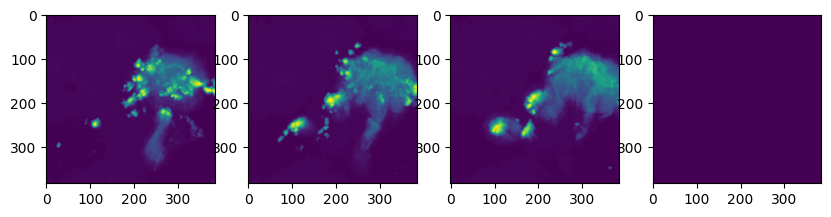

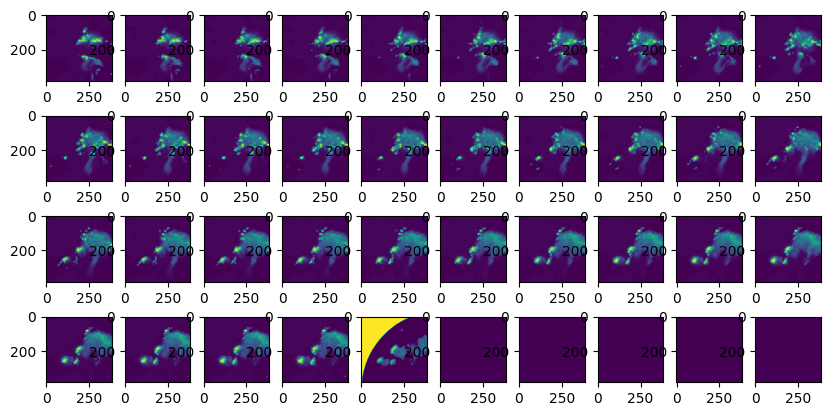

In [115]:
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
 
file_index = 14
with h5py.File('%s/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5' % DATA_PATH,'r') as hf:
    event_id = hf['id'][file_index]
    vil      = hf['vil'][file_index] 
    
print('Event ID:',event_id)
print('Image shape:',vil.shape)

fig,axs=plt.subplots(1,4,figsize=(10,5))
axs[0].imshow(vil[:,:,10])
axs[1].imshow(vil[:,:,20])
axs[2].imshow(vil[:,:,30])
axs[3].imshow(vil[:,:,40])
plt.show()


fig,axs=plt.subplots(4,10,figsize=(10,5))

for i in range (0,10):
    axs[0][i].imshow(vil[:,:,i])
    axs[1][i].imshow(vil[:,:,i+10])
    axs[2][i].imshow(vil[:,:,i+20])
    axs[3][i].imshow(vil[:,:,i+30])
plt.show()

the data frame is filtered based on the event id and this events data frame has all the information related to the event id. 

In [116]:
events=df[df.id.str.startswith('S835047')]

events

,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
19299,S835047,vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5,14,vil,2019-06-26 21:32:00,-122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.290709
22412,S835047,ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0...,12,ir107,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.195297,30.619873,0.000000
29236,S835047,ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0...,12,ir069,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.988350,-21.160448,0.000000
41182,S835047,vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5,34,vis,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.017251,1.159615,0.000000
72402,S835047,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5,0,lght,2019-06-26 21:32:00,NaN,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,328332.000000,0.000000


For each of the image kinds in SEVIR that correspond to the specified event id=835047, there are rows in this events data frame. The following code pulls image data for each category from rows of events.
The code below shows how to extract an event observed by four image types: vis, vil, ir069 and ir107

(<matplotlib.image.AxesImage at 0x112cb5ed0>, Text(0.5, 1.0, 'VIL'))

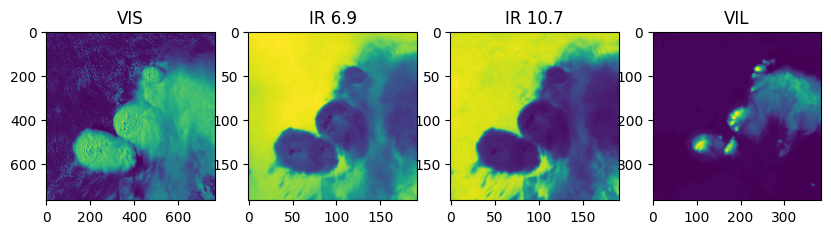

In [117]:
def read_data( sample_event, img_type, data_path=DATA_PATH ):
    """
    Reads single SEVIR event for a given image type.
    
    Parameters
    ----------
    events   pd.DataFrame
        SEVIR catalog rows matching a single ID
    img_type   str
        SEVIR image type
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array
       LxLx49 tensor containing event data
    """
    fn = events[events.img_type==img_type].squeeze().file_name
    fi = events[events.img_type==img_type].squeeze().file_index
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data=hf[img_type][fi] 
    return data

vis = read_data(events, 'vis')
ir069 = read_data(events, 'ir069')
ir107 = read_data(events, 'ir107')
vil = read_data(events, 'vil')

# plot a frame from each img_type
fig,axs = plt.subplots(1,4,figsize=(10,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')

#### Visualising SEVIR Data :
This below code included lighting along with all image types.To include lightening lght in the data gathered in the previous result, we first need to convert it to a LXLX49 to display it along with the other image types. The following code achieves this by converting the flash data into flash counts per pixel per 5 minute frame.

In [118]:
import numpy as np
def lght_to_grid(data):
    """
    Converts SEVIR lightning data stored in Nx5 matrix to an LxLx49 tensor representing
    flash counts per pixel per frame
    
    Parameters
    ----------
    data  np.array
       SEVIR lightning event (Nx5 matrix)
       
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts
    """
    FRAME_TIMES = np.arange(-120.0,125.0,5) * 60 # in seconds
    out_size = (48,48,len(FRAME_TIMES))
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # filter out points outside the grid
    x,y=data[:,3],data[:,4]
    m=np.logical_and.reduce( [x>=0,x<out_size[0],y>=0,y<out_size[1]] )
    data=data[m,:]
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # Filter/separate times
    # compute z coodinate based on bin locaiton times
    t=data[:,0]
    z=np.digitize(t,FRAME_TIMES)-1
    z[z==-1]=0 # special case:  frame 0 uses lght from frame 1

    x=data[:,3].astype(np.int64)
    y=data[:,4].astype(np.int64)

    k=np.ravel_multi_index(np.array([y,x,z]),out_size)
    n = np.bincount(k,minlength=np.prod(out_size))
    return np.reshape(n,out_size).astype(np.float32)

In [119]:
def read_lght_data( sample_event, data_path=DATA_PATH ):
    """
    Reads lght data from SEVIR and maps flash counts onto a grid  
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts for selected event
    
    """
    fn = sample_event[sample_event.img_type=='lght'].squeeze().file_name
    id = sample_event[sample_event.img_type=='lght'].squeeze().id
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data      = hf[id][:] 
    return lght_to_grid(data)



(<matplotlib.image.AxesImage at 0x111611e40>, Text(0.5, 1.0, 'Lightning'))

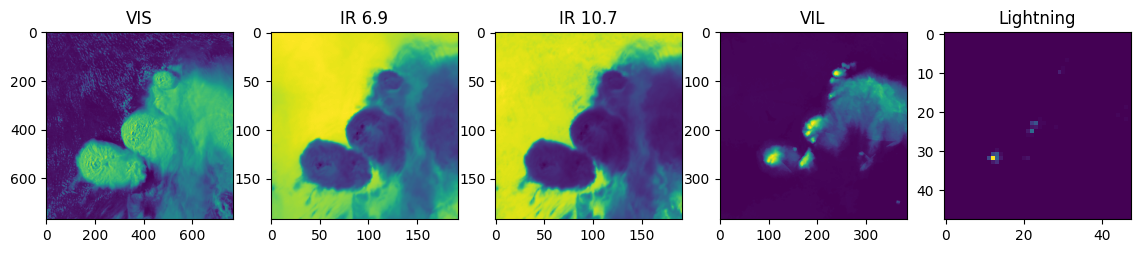

In [120]:
lght = read_lght_data(events)

# include lightning counts in plot
fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx]), axs[4].set_title('Lightning')

- The above plots used the default colors to visualise the data. 
- There is git repo https://github.com/MIT-AI-Accelerator/eie-sevir. 
- This repo should be cloned so that we can see coloured images the way they are expected in the SEVIR Data.
- The Data is cloned to the DATA_PATH repo, so in the below code we append that path to import the color maps
- get_cmap is present in display.py file in the folder which is used to color different image types accordingly

(<matplotlib.image.AxesImage at 0x1108a4670>, Text(0.5, 1.0, 'Lightning'))

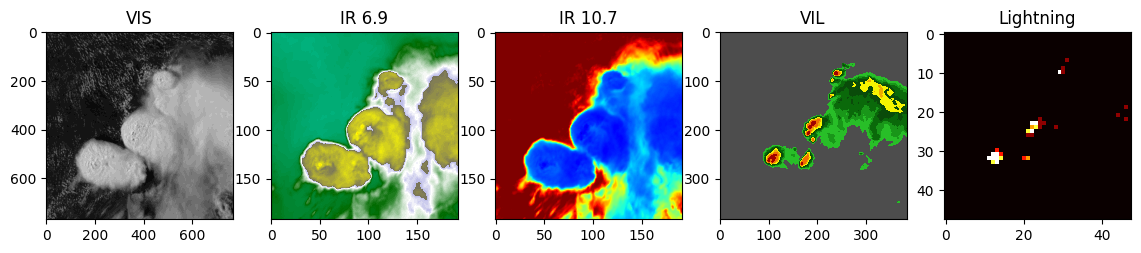

In [121]:
import sys
sys.path.append(DATA_PATH) # add sevir module to path
from sevir.display import get_cmap
# Get colormaps for encoded types
vis_cmap,vis_norm,vis_vmin,vis_vmax = get_cmap('vis',encoded=True)
ir069_cmap,ir069_norm,ir069_vmin,ir069_vmax = get_cmap('ir069',encoded=True)
ir107_cmap,ir107_norm,ir107_vmin,ir107_vmax = get_cmap('ir107',encoded=True)
vil_cmap,vil_norm,vil_vmin,vil_vmax = get_cmap('vil',encoded=True)
lght_cmap,lght_norm,lght_vmin,lght_vmax = get_cmap('lght',encoded=True)

fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx],cmap=vis_cmap,norm=vis_norm), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx],cmap=ir069_cmap,norm=ir069_norm,vmin=ir069_vmin,vmax=ir069_vmax), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx],cmap=ir107_cmap,norm=ir107_norm,vmin=ir107_vmin,vmax=ir107_vmax), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx],cmap=lght_cmap,norm=lght_norm,vmin=lght_vmin,vmax=lght_vmax), axs[4].set_title('Lightning')

#### GEO Referencing SEVIR EVENT:
The catalog provides the latitudes and longitudes information to perform the georeferencing the data. This information is required to find a particular region in the map.

In [122]:
events.proj.values[0]

'+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=6370997.0 +ellps=sphere '

The class below encodes the formulas for this particular projection. Using this, it's possible to convert between pixel and lat/lon coordinates for each event in SEVIR.

In [123]:
import re
import numpy as np
class LeapProjection():
    """
    Translates between pixel coordinates (X,Y) and Lat lon coordinates for a given SEVIR event
    projected in laea.
    
    Parameters
    ----------
    event  pd.Series
        One row from SEVIR catalog
    """
    def __init__(self,event):
        self.proj = event.proj 
        self.lat0 = float(re.compile('\+lat_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.lon0 = float(re.compile('\+lon_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.R = float(re.compile('\+a=(\d+)').search(self.proj).groups()[0])
        self.llcrnlat = event.llcrnrlat
        self.llcrnlon = event.llcrnrlon
        self.refX, self.refY = self.forward(self.llcrnlon,self.llcrnlat,pixel=False)
        self.binX = event.width_m / event.size_x
        self.binY = event.height_m / event.size_y

In [124]:
import re
import numpy as np
class LaeaProjection():
    """
    Translates between pixel coordinates (X,Y) and Lat lon coordinates for a given SEVIR event
    projected in laea.
    
    Parameters
    ----------
    event  pd.Series
        One row from SEVIR catalog
    """
    def __init__(self,event):
        self.proj = event.proj 
        self.lat0 = float(re.compile('\+lat_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.lon0 = float(re.compile('\+lon_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.R = float(re.compile('\+a=(\d+)').search(self.proj).groups()[0])
        self.llcrnlat = event.llcrnrlat
        self.llcrnlon = event.llcrnrlon
        self.refX, self.refY = self.forward(self.llcrnlon,self.llcrnlat,pixel=False)
        self.binX = event.width_m / event.size_x
        self.binY = event.height_m / event.size_y
        
    def forward(self,lon,lat,pixel=True):
        """
        Maps lat/lon to pixel x,y.  For projection coordinates instead of pixel, set pixel=False.
        """
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        k = self.R * np.sqrt(2/(1+sind(self.lat0)*sind(lat)+cosd(self.lat0)*cosd(lat)*cosd(lon-self.lon0)))
        x = k*cosd(lat)*sind(lon-self.lon0)
        y = k*(cosd(self.lat0)*sind(lat) - sind(self.lat0)*cosd(lat)*cosd(lon-self.lon0))
        if pixel:
            x = (x-self.refX) / self.binX
            y = (y-self.refY) / self.binY
        return x,y
    def inverse(self,x,y,pixel=True):
        """
        Maps pixel coordinates to (lon,lat) position.  If passing projection corrdinates, set pixel=False.
        """
        if pixel:
            x = x*self.binX + self.refX
            y = y*self.binY + self.refY
        x/=self.R
        y/=self.R
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        rho = np.sqrt(x*x+y*y)
        c = 2*np.arcsin(0.5*rho)
        sinc = np.sin(c)
        cosc = np.cos(c)
        lat = 180/np.pi*np.arcsin(cosc*sind(self.lat0)+y*sinc*cosd(self.lat0)/rho)
        lon = self.lon0+180/np.pi*np.arctan(x*sinc/(rho*cosd(self.lat0)*cosc - y*sind(self.lat0)*sinc))
        return lon,lat
        

Using this class, we can get a grid of latitudes and longitudes for the grids

Text(0.5, 1.0, 'Pixel Longitudes')

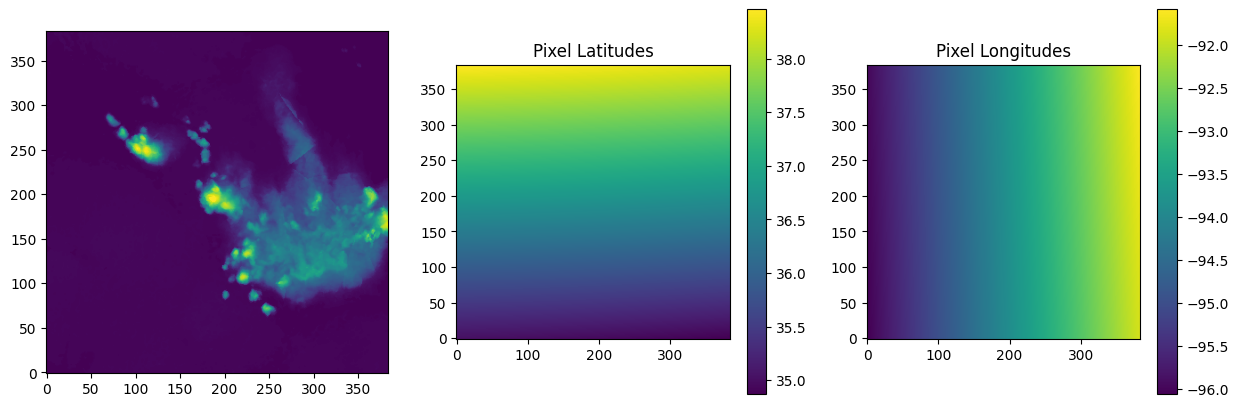

In [125]:
proj = LaeaProjection( events[events.img_type=='vil'].squeeze() )
X,Y = np.meshgrid(np.arange(vil.shape[0]),np.arange(vil.shape[0]))
lons,lats = proj.inverse(X,Y)

# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(vil[:,:,20],origin='lower')
la = ax[1].imshow(lats,origin='lower') 
fig.colorbar(la,ax=ax[1]) 
ax[1].set_title('Pixel Latitudes')
lo = ax[2].imshow(lons,origin='lower') 
fig.colorbar(lo,ax=ax[2]) 
ax[2].set_title('Pixel Longitudes')

This particular domain overlaps with Missouri. We can add markers for particular locations by converting from lat/lon coordinates into the image pixel coordinates. 

we were able to identify this location by querying the StormEventslocations_2019 file which was downloaded from noaa

x=192.107485,y=192.449596


Text(162.10748498892426, 162.4495960216667, 'Cassville, MI')

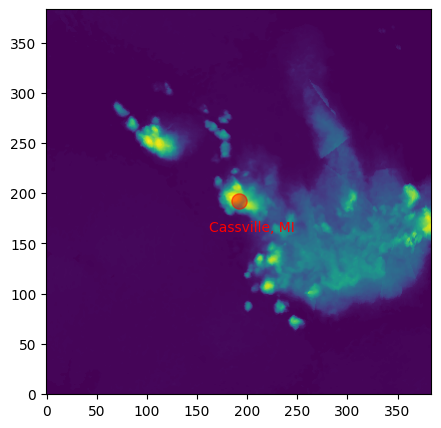

In [126]:
lat,lon = 36.69, -93.87 # Cassville, MI
x,y=proj.forward(lon,lat)
print('x=%f,y=%f' % (x,y))
# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(vil[:,:,20],origin='lower')
ax.plot(x,y,linestyle='none', marker="o", markersize=11, alpha=0.5, c="red")
ax.text(x-30,y-30,'Cassville, MI',color='r')

You may visualize the georeferenced result with characteristics like coast lines, state borders, and other attractive map features using a number of Python tools that compute these conversions for you. Here, Basemap is used to draw state borders in the below code.

Text(162107.48498892388, 162449.59602166762, 'Cassville, MI')

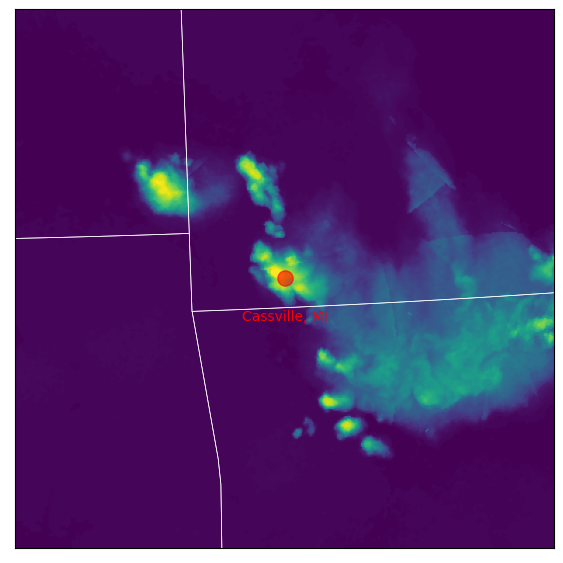

In [127]:
# Note:  Requires basemap module to run
import warnings
import os
os.environ["PROJ_LIB"] = "/Users/moukthikamanapati/opt/anaconda3";
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap # conda/pip install basemap basemap-data-hires
# Create Basemap Object
s=events[events.img_type=='vil'].squeeze() 
fig,ax=plt.subplots(1,1,figsize=(7,7))
m = Basemap(llcrnrlat=s.llcrnrlat, llcrnrlon=s.llcrnrlon,
            urcrnrlat=s.urcrnrlat,urcrnrlon=s.urcrnrlon,
            width=s.width_m, height=s.height_m,
            lat_0=38, lon_0=-98,
            projection='laea',
            resolution='i',
            ax=ax)
m.drawstates(color='w')
m.drawcoastlines(color='w')
m.drawcountries(color='w')
m.imshow(vil[:,:,24])

lat,lon = 36.69, -93.87 # Cassville, MI
x,y=m(lon,lat) # will be in projection coordinates
m.plot(x,y,linestyle='none', marker="o", markersize=11, alpha=0.6, c="red")
ax.text(x-30e3,y-30e3,'Cassville, MI',color='r')